In [1]:
import csv
from itertools import islice
from pathlib import Path
import sys

import numpy as np
import tifffile
import shapely.wkt
import shapely.affinity
import matplotlib.pyplot as plt
from descartes.patch import PolygonPatch
%matplotlib inline

csv.field_size_limit(sys.maxsize);

In [2]:
IM_ID = '6010_1_2'

In [3]:
im_data = tifffile.imread('./three_band/{}.tif'.format(IM_ID))
im_data.shape

(3, 3349, 3396)

(<matplotlib.figure.Figure at 0x10ba42588>,
 <matplotlib.image.AxesImage at 0x11137db38>)

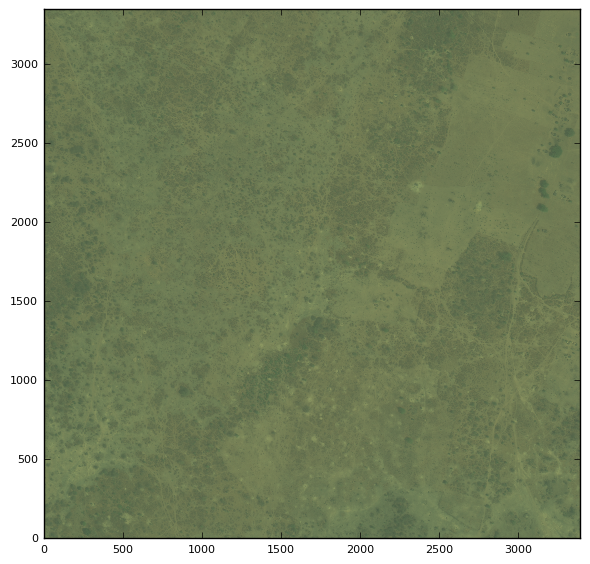

In [4]:
tifffile.imshow(im_data, origin='lower')

In [5]:
with open('./train_wkt_v4.csv') as f:
    wkt_data = list(csv.reader(f))

In [6]:
with open('./grid_sizes.csv') as f:
    grid_sizes = {im_id: (float(x), float(y)) for im_id, x, y in islice(csv.reader(f), 1, None)}

In [7]:
[(idx, row[0], row[1], row[2][:50]) for idx, row in enumerate(wkt_data) if row[0].startswith(IM_ID)]

[(221, '6010_1_2', '1', 'MULTIPOLYGON EMPTY'),
 (222, '6010_1_2', '2', 'MULTIPOLYGON (((0.008926999999999999 -0.0085749999'),
 (223, '6010_1_2', '3', 'MULTIPOLYGON EMPTY'),
 (224, '6010_1_2', '4', 'MULTIPOLYGON (((0.008765 -0.007289, 0.00885 -0.007'),
 (225, '6010_1_2', '5', 'MULTIPOLYGON (((0.007405 -0.009022000000000001, 0.'),
 (226, '6010_1_2', '6', 'MULTIPOLYGON EMPTY'),
 (227, '6010_1_2', '7', 'MULTIPOLYGON EMPTY'),
 (228, '6010_1_2', '8', 'MULTIPOLYGON EMPTY'),
 (229, '6010_1_2', '9', 'MULTIPOLYGON EMPTY'),
 (230, '6010_1_2', '10', 'MULTIPOLYGON EMPTY')]

In [8]:
COLORS = {
        1 : '0.7',
        2 : '0.4',
        3 : '#b35806',
        4 : '#dfc27d',
        5 : '#1b7837',
        6 : '#a6dba0',
        7 : '#74add1',
        8 : '#4575b4',
        9 : '#f46d43',
        10: '#d73027',
        }
ZORDER = {
        1 : 5,
        2 : 5,
        3 : 4,
        4 : 1,
        5 : 3,
        6 : 2,
        7 : 7,
        8 : 8,
        9 : 9,
        10: 10,
        }

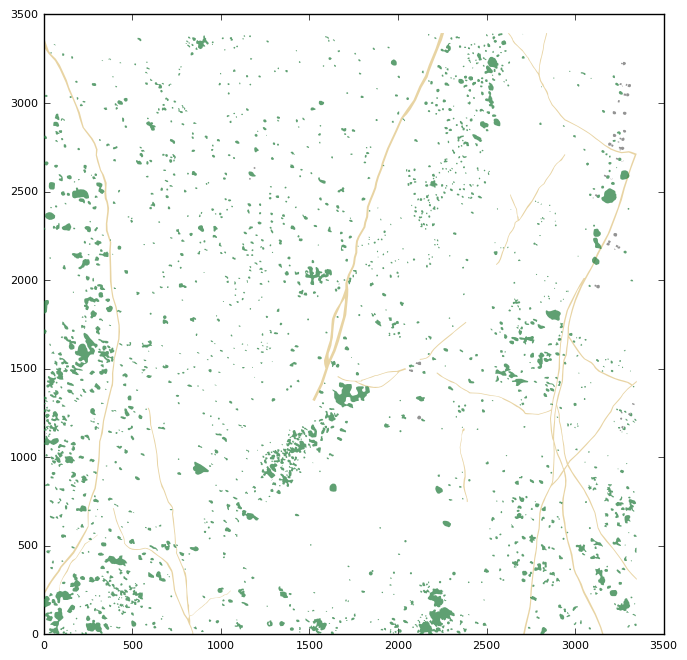

In [38]:
_, W, H = im_data.shape
W_ = W * (W/(W+1))
H_ = H * (H/(H+1))

x_max, y_min = grid_sizes[IM_ID]
x_scaler = W_ / x_max
y_scaler = H_ / y_min

def scale(polygons):
    return shapely.affinity.scale(polygons, xfact=x_scaler, yfact=y_scaler, origin=(0,0,0))

poly_by_type = {int(poly_type): scale(shapely.wkt.loads(poly))
                for im_id, poly_type, poly in wkt_data if im_id == IM_ID}

fig, ax = plt.subplots(figsize=(8, 8))
for poly_type, poly in poly_by_type.items():
    for polygon in poly:
        mpl_poly = PolygonPatch(polygon,
                                color=COLORS[poly_type],
                                lw=0,
                                alpha=0.7,
                                zorder=ZORDER[poly_type])
        ax.add_patch(mpl_poly)
       
ax.relim()
ax.autoscale_view()

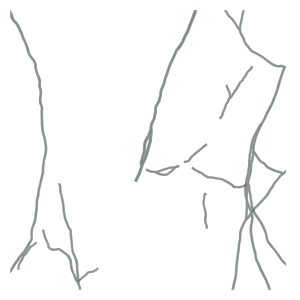

In [36]:
roads = poly_by_type[4]
roads

In [37]:
from utils import mask_for_polygons
mask = mask_for_polygons((W, H), roads)
import cv2
cv2.imwrite('mask.png', mask * 255)

True

In [62]:
names = {p.name.split('.')[0] for p in Path('./three_band/').iterdir()}
[(idx, row[0], row[1], row[2][:50]) for idx, row in enumerate(wkt_data) if row[0] in names]

[(71, '6010_4_2', '1', 'MULTIPOLYGON EMPTY'),
 (72, '6010_4_2', '2', 'MULTIPOLYGON EMPTY'),
 (73, '6010_4_2', '3', 'MULTIPOLYGON EMPTY'),
 (74, '6010_4_2', '4', 'MULTIPOLYGON (((0 -0.002108, 6.4e-05 -0.002069, 0.'),
 (75, '6010_4_2', '5', 'MULTIPOLYGON (((0.009169 -0.008973, 0.009169 -0.00'),
 (76, '6010_4_2', '6', 'MULTIPOLYGON EMPTY'),
 (77, '6010_4_2', '7', 'MULTIPOLYGON EMPTY'),
 (78, '6010_4_2', '8', 'MULTIPOLYGON EMPTY'),
 (79, '6010_4_2', '9', 'MULTIPOLYGON EMPTY'),
 (80, '6010_4_2', '10', 'MULTIPOLYGON EMPTY'),
 (161, '6010_4_4', '1', 'MULTIPOLYGON EMPTY'),
 (162, '6010_4_4', '2', 'MULTIPOLYGON EMPTY'),
 (163, '6010_4_4', '3', 'MULTIPOLYGON EMPTY'),
 (164, '6010_4_4', '4', 'MULTIPOLYGON EMPTY'),
 (165, '6010_4_4', '5', 'MULTIPOLYGON (((5.8e-05 -0.009042, 5.4e-05 -0.0090'),
 (166, '6010_4_4', '6', 'MULTIPOLYGON EMPTY'),
 (167, '6010_4_4', '7', 'MULTIPOLYGON EMPTY'),
 (168, '6010_4_4', '8', 'MULTIPOLYGON EMPTY'),
 (169, '6010_4_4', '9', 'MULTIPOLYGON EMPTY'),
 (170, '6010_4_4', '